In [33]:
import pandas as pd
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
RESULTS_PATH = 'results'
DATASET_NAME = 'MSVD'
STAGE_N = 2

RESULTS_CSV_NAME = os.path.join(RESULTS_PATH, f'{DATASET_NAME}_test_stage{STAGE_N}.csv')

In [54]:
df = pd.read_csv(RESULTS_CSV_NAME, header=None, names=['video_id', 'generated_caption', 'true_captions'])
df['video_id'] = list(map(lambda vid: vid[2:], df['video_id']))
df['true_captions'] = list(map(lambda c: str(c).split('/'), df['true_captions']))
df.head()

,video_id,generated_caption,true_captions
0,ybVb3t560oY_0_9,a girl is playing with a toy,"[ the chickens are fighting the rabbits , two..."
1,qDjtN7xxNr4_44_51,two men are fighting,"[ a group of men are fighting , two men are f..."
2,kWLNZzuo3do_25_32,a woman is slicing a vegetable,"[ making <UNK> <UNK> noodle , a woman is chop..."
3,j2Dhf-xFUxU_13_20,a woman is slicing an onion,"[ the man sliced the tortillas into quarters ,..."
4,jcIrD7rNvTM_10_21,a dog is eating,"[ a dog is walking around , a 3 legged dog is..."


In [70]:
def print_example(row):
    print()
    print("-"*50)
    print(f"Example: {row['video_id']}")
    print("-"*50)

    print('\nGenerated caption:')
    print(row['generated_caption'])

    print('\nTrue captions:')
    for c in row['true_captions']:
        print(c)

In [73]:
VIDEOS_DIRECTORY = os.path.join('data', DATASET_NAME, 'videos')
VIDEO_ID = 'n_Z0-giaspE_62_78'

VIDEO_FILENAME = os.path.join(VIDEOS_DIRECTORY, f"{VIDEO_ID}.avi")

In [17]:
# 1. Initialize reading video object
cap = cv2.VideoCapture(VIDEO_FILENAME)

# 2. Cycle through pictures
while cap.isOpened():
    ret, frame = cap.read()

    if ret:
        cv2.imshow("frame", frame)
    else:
        print("Video playback is complete!")
        break

    # Quit playing
    key = cv2.waitKey(25)
    if key == 27:  # Button esc
        break

# 3. Free resources
cap.release()
cv2.destroyAllWindows()

Video playback is complete!


In [63]:
def load_frames(video_filename, take_n=0):
    frames = []
    cap = cv2.VideoCapture(VIDEO_FILENAME)
    while cap.isOpened():
        ret, frame = cap.read()

        if ret:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(frame)
        else:
            break

    frames = np.array(frames)

    if take_n > 0:
        total_frames = frames.shape[0]
        frame_idx = np.arange(0, total_frames, total_frames//take_n+1)
        print(frame_idx)
        frames = frames[frame_idx,:,:,:]

    return frames

In [64]:
frames = load_frames(VIDEO_FILENAME, take_n=5)
# print(frames.shape)

[  0  43  86 129 172]
(5, 464, 640, 3)


In [66]:
def plot_frames(frames, save_to=None):
    total_frames = frames.shape[0]
    
    plt.figure(figsize=(5*total_frames, 4))
    for i in range(0, total_frames):
        plt.subplot(1, total_frames, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(frames[i,])
    
    if save_to:
        plt.savefig(save_to, dpi=300)
    else:    
        plt.show()

In [81]:
for i in range(30,40):
    print_example(df.iloc[i])


--------------------------------------------------
Example: gtixLEvO2Us_0_6
--------------------------------------------------

Generated caption:
 a woman is pushing a car

True captions:
 a girl dances on stairs 
 a woman is dancing 
 the girl danced on stage 
 a girl is sitting on the steps 
 a female is dancing 
 a woman is dancing 
 a woman is dancing on the stairs 
 a seated girl pretends to be dancing 
 a woman is sitting down and dancing 
 a woman dances while sitting on the stairs 
 a woman is dancing on a set of stairs 
 a girl is dancing 
 a woman is being photographed 
 a girl dancing on the wooden steps 
 a girl dancing 
 a woman is dancing 
 a woman is playing 
 a girl is sitting on the steps 
 a girl is sitting down and dancing 
 a girl is dancing 
 a woman is shaking her body around 
 a girl is sitting on stairs doing dance moves 
 a girl sitting and dancing 
 the girl can do the sit dance 
 a girl is dancing in a floor 
 a woman is doing some dance steps 
 a girl is d

[  0  56 112 168 224]

--------------------------------------------------
Example: 32    zTn-nNj5Bng_8_19
Name: video_id, dtype: object
--------------------------------------------------

Generated caption:
32     a woman is riding a horse
Name: generated_caption, dtype: object

True captions:
[' a horse rider playing the game ', ' a person rides a horse in a field ', ' someone is riding a horse ', ' a person rides a horse ', ' a person is riding a horse ', ' a horse rider riding <UNK> on the ground ', ' a man is riding a horse ', ' a person is riding a horse ', ' a lady is riding the horse ', ' the man is riding the horse ', ' <UNK> <UNK> <UNK> <UNK> 2010 dressage ', ' he is hars raiding ', ' a girl is riding a horse ', ' a man is riding on a horse ', ' a man <UNK> riding a horse ', ' the horse and rider trotted across the field ', ' a man riding with a horse ', ' a man is riding a horse in an open field surrounded with greenery ', ' a man enjoying the ride of horse ', ' the man is ho

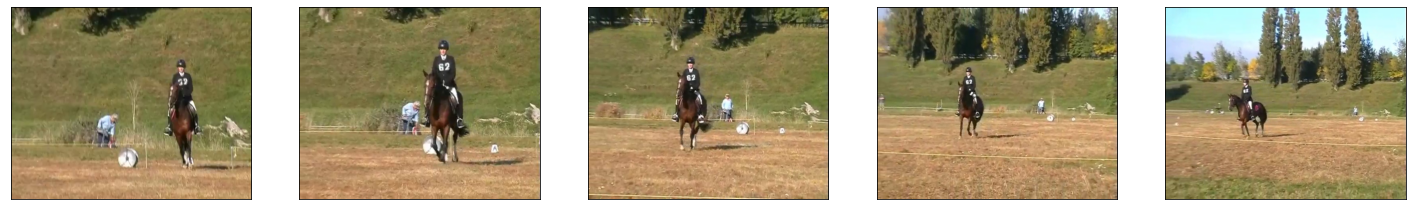

In [82]:
VIDEO_ID = 'zTn-nNj5Bng_8_19'

VIDEOS_DIRECTORY = os.path.join('data', DATASET_NAME, 'videos')
VIDEO_FILENAME = os.path.join(VIDEOS_DIRECTORY, f"{VIDEO_ID}.avi")

frames = load_frames(VIDEO_FILENAME, take_n=5)
plot_frames(frames, save_to=os.path.join('figures', DATASET_NAME, f"{VIDEO_ID}.png"))
print_example(df[df['video_id'] == f"{VIDEO_ID}"])